In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df=pd.read_csv(r"C:\Users\adity\Downloads\Compressed\03. Google Play Store (Regression)\data\google_cleaned.csv")

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [5]:
df.shape

(10840, 16)

In [6]:
df.sample()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
1291,The TK-App - everything under control,HEALTH_AND_FITNESS,4.5,8642,18.0,100000,Free,0.0,Everyone,Health & Fitness,2018-08-02,1.20,4.4 and up,2,8,2018


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
 13  Day             10840 non-null  int64  
 14  Month           10840 non-null  int64  
 15  Year            10840 non-null  int64  
dtypes: float64(3), int64(5), object(8)
memory usage: 1.3+ MB


In [8]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
Day                  0
Month                0
Year                 0
dtype: int64

In [9]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
Day                  0
Month                0
Year                 0
dtype: int64

In [10]:
df['Rating']

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10835    4.5
10836    5.0
10837    NaN
10838    4.5
10839    4.5
Name: Rating, Length: 10840, dtype: float64

In [11]:
df.describe()

,Rating,Reviews,Size,Installs,Price,Day,Month,Year
count,9366.000000,1.084000e+04,9145.000000,1.084000e+04,10840.000000,10840.000000,10840.000000,10840.000000
mean,4.191757,4.441529e+05,21.506534,1.546434e+07,1.027368,15.609041,6.422325,2017.399723
std,0.515219,2.927761e+06,22.596021,8.502936e+07,15.949703,9.561621,2.578388,1.100914
min,1.000000,0.000000e+00,0.010000,0.000000e+00,0.000000,1.000000,1.000000,2010.000000
25%,4.000000,3.800000e+01,4.900000,1.000000e+03,0.000000,6.000000,5.000000,2017.000000
50%,4.300000,2.094000e+03,13.000000,1.000000e+05,0.000000,16.000000,7.000000,2018.000000
75%,4.500000,5.477550e+04,30.000000,5.000000e+06,0.000000,24.000000,8.000000,2018.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000,31.000000,12.000000,2018.000000


In [12]:
df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
count,10840,10840,9366.000000,1.084000e+04,9145.000000,1.084000e+04,10839,10840.000000,10840,10840,10840,10832,10838,10840.000000,10840.000000,10840.000000
unique,9659,33,NaN,NaN,NaN,NaN,2,NaN,6,119,1377,2831,33,NaN,NaN,NaN
top,ROBLOX,FAMILY,NaN,NaN,NaN,NaN,Free,NaN,Everyone,Tools,2018-08-03,Varies with device,4.1 and up,NaN,NaN,NaN
freq,9,1972,NaN,NaN,NaN,NaN,10039,NaN,8714,842,326,1459,2451,NaN,NaN,NaN
mean,NaN,NaN,4.191757,4.441529e+05,21.506534,1.546434e+07,NaN,1.027368,NaN,NaN,NaN,NaN,NaN,15.609041,6.422325,2017.399723
std,NaN,NaN,0.515219,2.927761e+06,22.596021,8.502936e+07,NaN,15.949703,NaN,NaN,NaN,NaN,NaN,9.561621,2.578388,1.100914
min,NaN,NaN,1.000000,0.000000e+00,0.010000,0.000000e+00,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,2010.000000
25%,NaN,NaN,4.000000,3.800000e+01,4.900000,1.000000e+03,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,6.000000,5.000000,2017.000000
50%,NaN,NaN,4.300000,2.094000e+03,13.000000,1.000000e+05,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,16.000000,7.000000,2018.000000
75%,NaN,NaN,4.500000,5.477550e+04,30.000000,5.000000e+06,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,24.000000,8.000000,2018.000000


In [13]:
df[df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,26,2,2018
236,Box,BUSINESS,4.2,159872,NaN,10000000,Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device,31,7,2018
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up,24,7,2018
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37.0,10000000,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up,20,7,2018
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up,16,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,NaN,10000000,Free,0.0,Everyone,Productivity,2018-04-06,Varies with device,Varies with device,6,4,2018
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,NaN,1000000,Free,0.0,Everyone,Productivity,2018-08-06,Varies with device,Varies with device,6,8,2018
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,NaN,100000000,Free,0.0,Everyone,Productivity,2018-06-27,Varies with device,Varies with device,27,6,2018
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86.0,10000,Free,0.0,Everyone,Medical,2018-06-01,0.6.88,5.0 and up,1,6,2018


In [14]:
df=df.drop_duplicates()

In [15]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up,25,7,2017
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up,6,7,2018
10837,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up,20,1,2017
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,19,1,2015


## Exploring the data

can we segregate the data

In [16]:
numeric_feature=[i for i in df.columns if df[i].dtype!='O']

In [17]:
categorical_feature=[i for i in df.columns if df[i].dtype=='O']

In [18]:
numeric_feature

['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Day', 'Month', 'Year']

In [19]:
categorical_feature

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [20]:
df[numeric_feature]

,Rating,Reviews,Size,Installs,Price,Day,Month,Year
0,4.1,159,19.0,10000,0.0,7,1,2018
1,3.9,967,14.0,500000,0.0,15,1,2018
2,4.7,87510,8.7,5000000,0.0,1,8,2018
3,4.5,215644,25.0,50000000,0.0,8,6,2018
4,4.3,967,2.8,100000,0.0,20,6,2018
...,...,...,...,...,...,...,...,...
10835,4.5,38,53.0,5000,0.0,25,7,2017
10836,5.0,4,3.6,100,0.0,6,7,2018
10837,NaN,3,9.5,1000,0.0,20,1,2017
10838,4.5,114,NaN,1000,0.0,19,1,2015


In [21]:
df[categorical_feature]

,App,Category,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Free,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Free,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,Free,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Free,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...
10835,Sya9a Maroc - FR,FAMILY,Free,Everyone,Education,2017-07-25,1.48,4.1 and up
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,Free,Everyone,Education,2018-07-06,1.0,4.1 and up
10837,Parkinson Exercices FR,MEDICAL,Free,Everyone,Medical,2017-01-20,1.0,2.2 and up
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,Free,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


In [22]:
df['App'].value_counts()

ROBLOX                                           9
8 Ball Pool                                      7
Bubble Shooter                                   6
Helix Jump                                       6
Zombie Catchers                                  6
                                                ..
Popsicle Launcher for Android P 9.0 launcher     1
PixelLab - Text on pictures                      1
P Launcher for Android™ 9.0                      1
Pacify (Android P theme) - Theme for Xperia™     1
iHoroscope - 2018 Daily Horoscope & Astrology    1
Name: App, Length: 9659, dtype: int64

In [23]:
df['App'].value_counts(normalize=True)
# it give in percentage form

ROBLOX                                           0.000869
8 Ball Pool                                      0.000676
Bubble Shooter                                   0.000579
Helix Jump                                       0.000579
Zombie Catchers                                  0.000579
                                                   ...   
Popsicle Launcher for Android P 9.0 launcher     0.000097
PixelLab - Text on pictures                      0.000097
P Launcher for Android™ 9.0                      0.000097
Pacify (Android P theme) - Theme for Xperia™     0.000097
iHoroscope - 2018 Daily Horoscope & Astrology    0.000097
Name: App, Length: 9659, dtype: float64

In [24]:
# check the normal distribution

In [25]:
num_df=df[numeric_feature]

In [26]:
cat_df=df[categorical_feature]

<AxesSubplot: xlabel='Rating', ylabel='Density'>

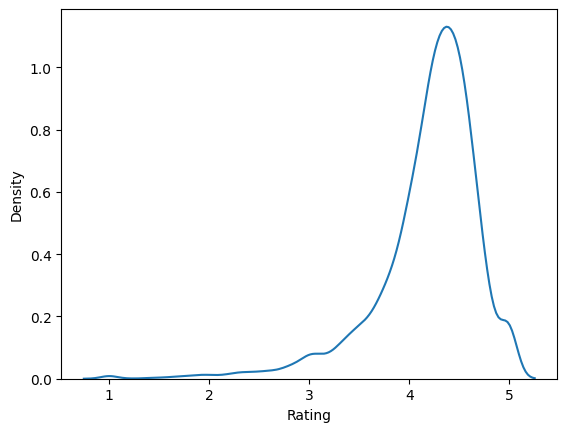

In [27]:
sns.kdeplot(num_df['Rating'])

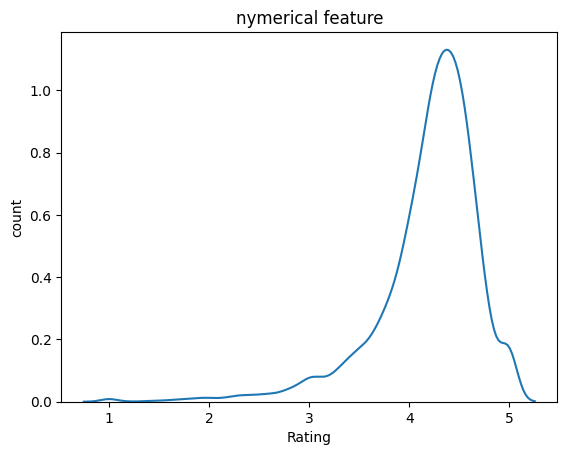

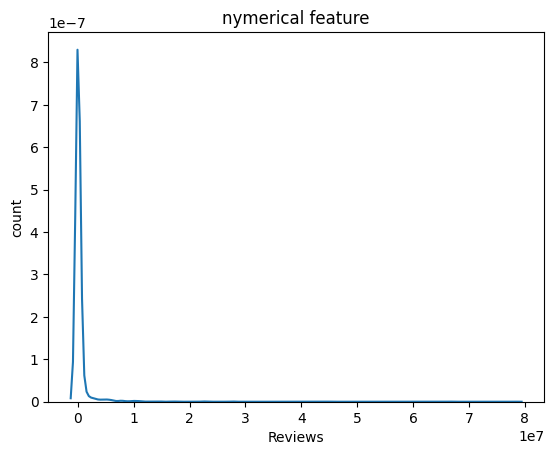

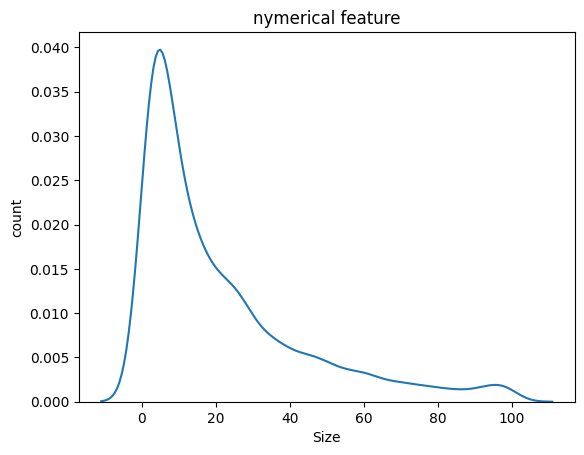

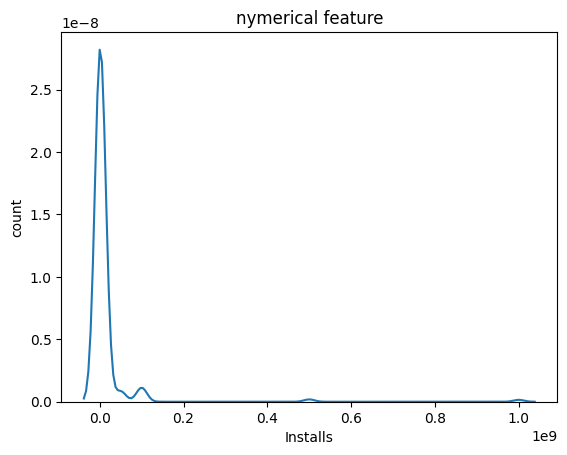

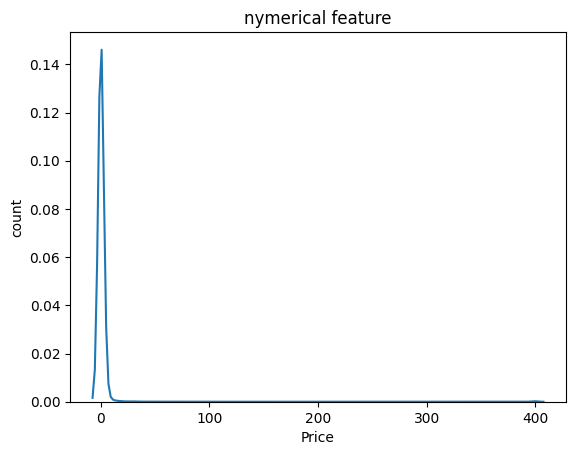

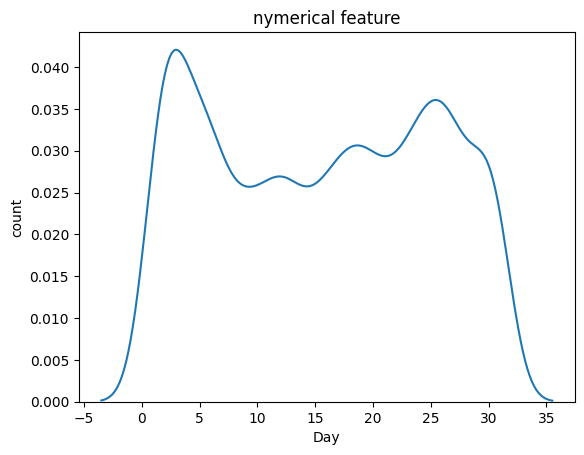

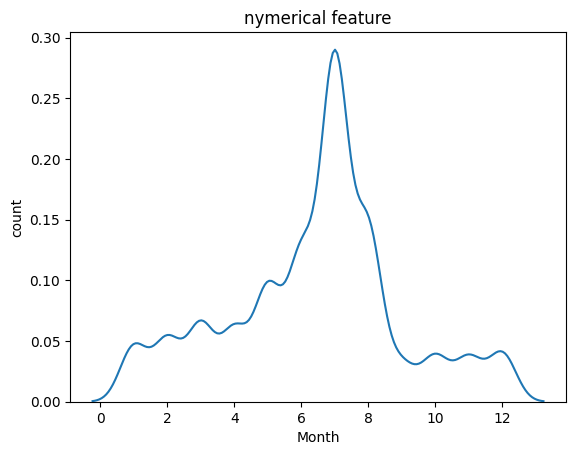

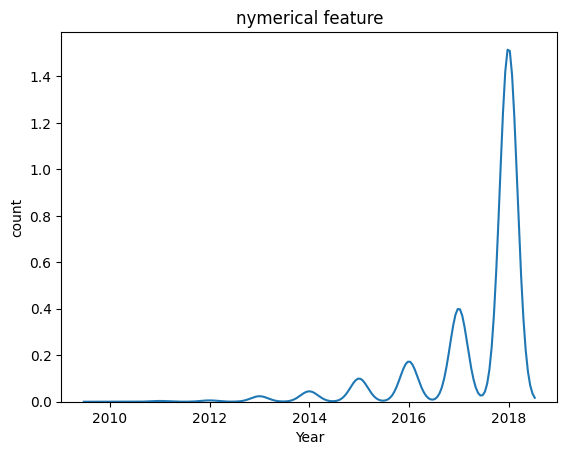

In [28]:
for feature in numeric_feature:
    sns.kdeplot(num_df[feature])
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title('nymerical feature')
    plt.show()


In [29]:
cat_df['Type'].value_counts()

Free    9591
Paid     765
Name: Type, dtype: int64